In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def apply_kernel(kernel, xs, ys):
    '''
    Apply kernel to two vector of features.
    Input:
        kernel: a binary function.
        xs: ndarray of shape (n, k)
        ys: ndarray of shape (m, k)
    Return:
        matrix of the pair-wise distance between xs, ys, ndarray of shape (n, m) 
    '''
    return np.array([[kernel(x, y) for y in ys] for x in xs])

def generate_covariance_matrix(kernel, beta, xs):
    '''
    Generate the covariance matrix from a list of features.
    Input:
        kernel: a binary function.
        beta: precision of signal noise
        xs: the list of features, ndarray of shape (n, k)
    Return:
        The matrix of covariance, ndarray of shape (n, n)
    '''
    return apply_kernel(kernel, xs, xs) + 1/beta*(np.identity(xs.shape[0]))
    

def predict(kernel, beta, xs, ys, zs):
    '''
    Estimate the distribution of labels of un-seen observations (zs) based on observed features (xs) and labels (ys). 
    Input: 
        kernel: a binary function.
        beta:   precision of signal noise
        xs:     features, ndarray of shape (n, )
        ys:     labels, ndarray of shape (n, )
        zs:     un-seen features, ndarray of shape (k, )
    Return:
        (m, s): m and s are the mean and standard deviation of predicted labels.
    '''
    m = apply_kernel(kernel, xs, zs).T @ np.linalg.inv(generate_covariance_matrix(kernel, beta, xs)) @ ys
    s = np.diag(apply_kernel(kernel, zs, zs)) + 1/beta - np.diag(apply_kernel(kernel, xs, zs).T @ np.linalg.inv(generate_covariance_matrix(kernel, beta, xs)) @ apply_kernel(kernel, xs, zs))
    return (m, s)

# A Toy Dataset

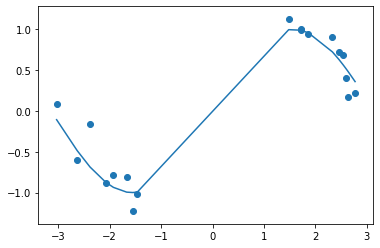

In [102]:
# a toy dataset generated from the sine function
npt = 30
features = (np.random.rand(npt) - 0.5) * 2*np.pi
features = np.sort(features) #for drawing only
labels = np.sin(features) + np.random.normal(scale=0.2, size=features.shape[0])
ground_truth = np.sin(features)

features = np.concatenate((features[:8], features[20:]), axis=0)
labels = np.concatenate((labels[:8], labels[20:]), axis=0)

plt.plot(features, np.sin(features))
plt.scatter(features, labels)

# Regression with the Gaussian Kernel

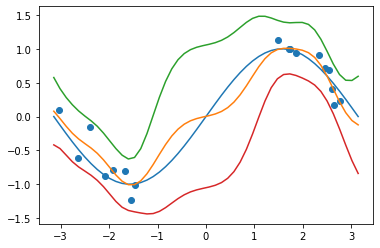

In [103]:
def gaussian_kernal(sigma):
    return lambda x1, x2: np.exp(-(x1-x2)**2/(2*sigma**2))

plt.scatter(features, labels)
features_test = np.linspace(-np.pi, np.pi, 50)
pred = predict(gaussian_kernal(0.5), 9, features, labels, features_test)
plt.plot(features_test, np.sin(features_test))
plt.plot(features_test, pred[0])
plt.plot(features_test, pred[0] + np.sqrt(pred[1]))
plt.plot(features_test, pred[0] - np.sqrt(pred[1]))